# IBM_HR_Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_csv(r"C:\Users\NAVEENKUMAR\Downloads\IBM-HR-Analytics-Employee-Attrition-and-Performance.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
train_data = pd.DataFrame(data)
train_data.sample(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
266,31,No,Travel_Rarely,1463,Research & Development,23,3,Medical,1,367,...,2,80,1,10,2,3,9,0,7,8
674,58,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,1,940,...,4,80,1,24,3,3,6,0,0,4


In [5]:
train_data.shape

(1470, 35)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
train_data.isnull().sum()  # As We Seen In There Is Not Having Any Null Values In The Data Set

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
train_data.duplicated().sum()  # There Is Not Having Any Duplicates In This Data Set

0

**Data Preprocessing**

- We See Each And Every Column To The Analysis Firstv
- Then We Observed data If Any Changes Reqiredment

In [11]:
train_data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
train_data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [13]:
train_data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [14]:
train_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [15]:
train_data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [16]:
train_data['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [17]:
train_data['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [18]:
train_data['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [19]:
train_data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [20]:
train_data['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [21]:
train_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [22]:
train_data['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [23]:
train_data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [24]:
train_data['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [25]:
train_data['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [26]:
train_data['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [27]:
train_data['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [28]:
train_data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [29]:
train_data['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [30]:
train_data['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

**Visulization The Data**

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

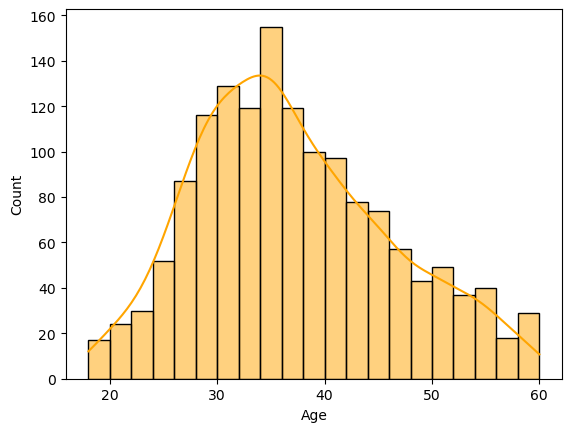

In [33]:
sns.histplot(data=train_data,x='Age',color='orange', binwidth=2,kde=True,)
plt.show()

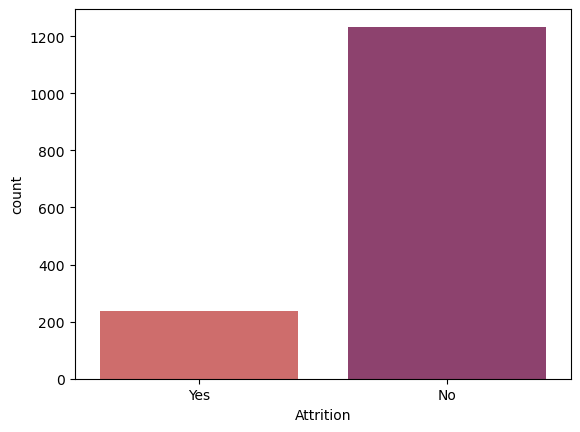

In [34]:
sns.countplot(x='Attrition',palette="flare",data=train_data)
plt.show()

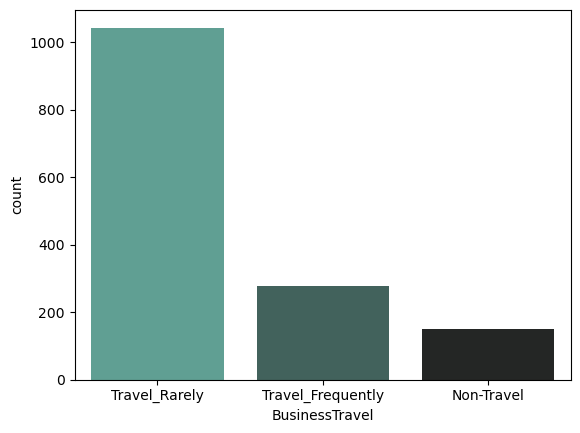

In [35]:
sns.countplot(x='BusinessTravel',palette="dark:#5A9_r",data=train_data)
plt.show()

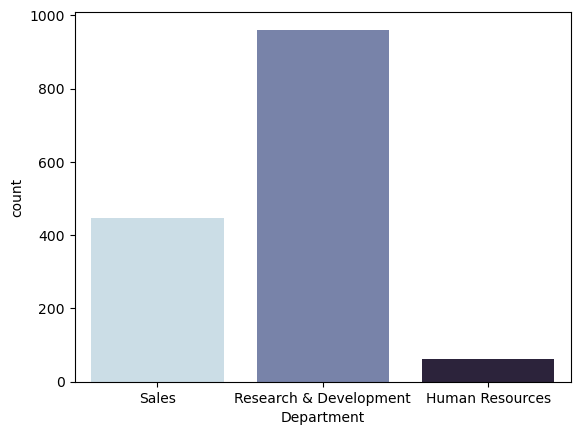

In [36]:
sns.countplot(x='Department',palette="ch:s=.25,rot=-.25",data=train_data)
plt.show()

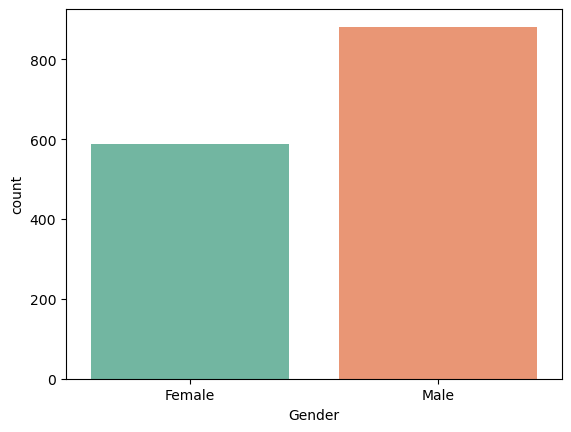

In [37]:
sns.countplot(x='Gender',palette="Set2",data=train_data)
plt.show()

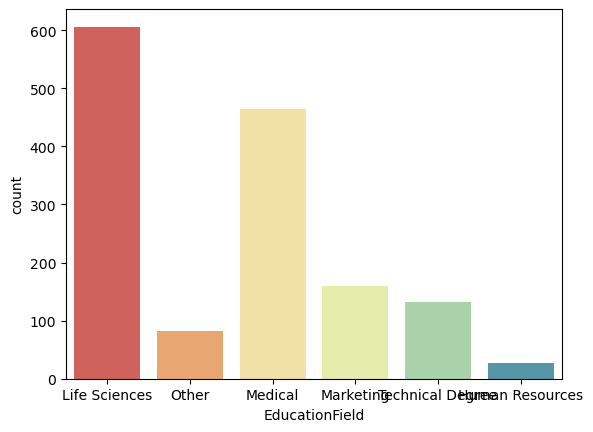

In [38]:
sns.countplot(x='EducationField',palette=('Spectral'),data=train_data)
plt.show()

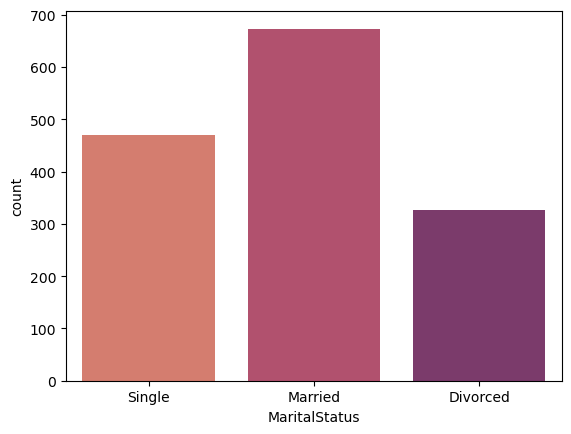

In [39]:
sns.countplot(x='MaritalStatus',palette=('flare'),data=train_data)
plt.show()

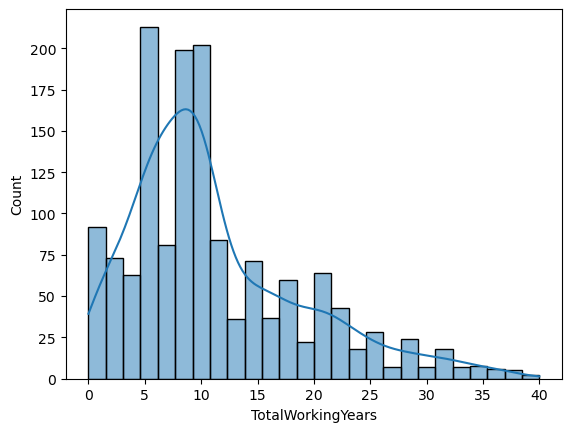

In [40]:
sns.histplot(x='TotalWorkingYears',kde=True,data=train_data)
plt.show()

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**We Need To Defind The Continous And Categorical Data Sets**

In [43]:
continous = train_data[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]

categorical= train_data[['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
                       'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating',
                       'RelationshipSatisfaction','WorkLifeBalance']]

discreate = train_data[['DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                       'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]


In [44]:
continous.skew()

Age              0.413286
DailyRate       -0.003519
HourlyRate      -0.032311
MonthlyIncome    1.369817
MonthlyRate      0.018578
dtype: float64

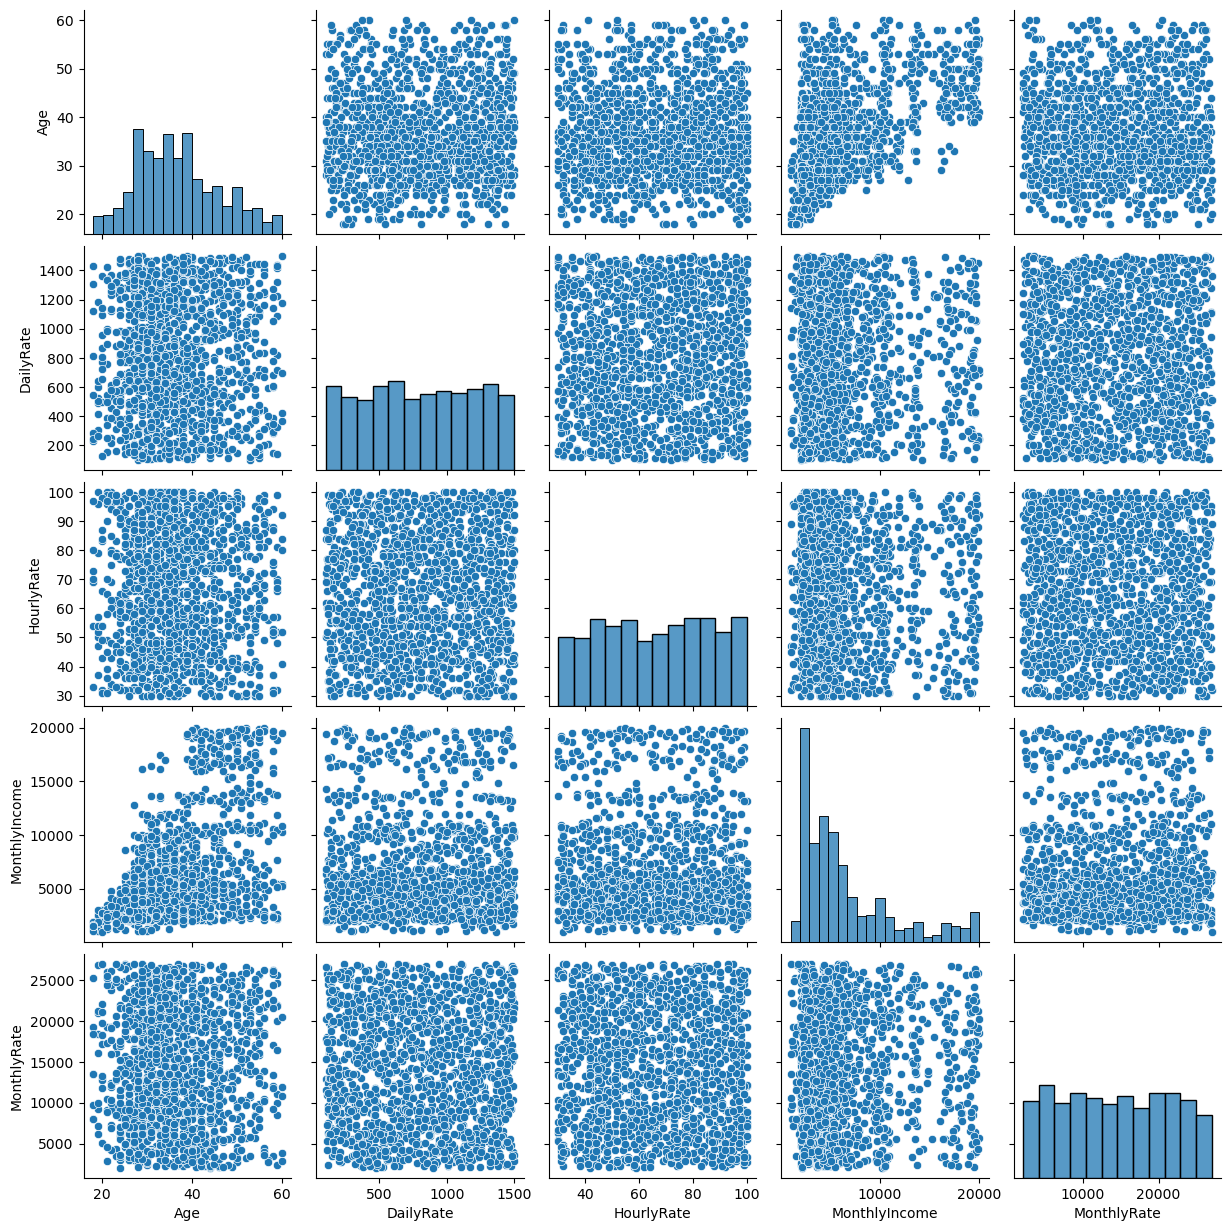

In [45]:
sns.pairplot(continous)
plt.show()

**Now We Need To Encoding & Scaling**

In [47]:
def print_unique_col_values(train_data):
    for columns in train_data:
        if train_data[columns].dtypes=='object':
            print(f'{columns}:{train_data[columns].unique()}')

In [48]:
print_unique_col_values(train_data)

Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']


In [49]:
train_data.drop(columns=['BusinessTravel','DailyRate','DistanceFromHome','Education','EmployeeNumber','EmployeeCount',
                                     'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole',
                             'JobSatisfaction','MaritalStatus','MonthlyRate','NumCompaniesWorked','Over18','OverTime',
                            'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                             'StandardHours','StockOptionLevel','WorkLifeBalance','TrainingTimesLastYear','YearsInCurrentRole',
                            'YearsSinceLastPromotion',
                             'YearsWithCurrManager','Attrition','TrainingTimesLastYear','YearsWithCurrManager'],inplace=True)

In [50]:
#------- We Need To Be Ecoding To the YES or NO Coulumns--------------

#train_data['Gender'].replace({'Female':1,'Male':0},inplace=True)
#train_data['Attrition'].replace({'Yes':1,'No':0},inplace=True)
#train_data['OverTime'].replace({'Yes':1,'No':0},inplace=True)
#train_data['Over18'].replace({'Y':1},inplace=True)
train_data['Department'].replace({'Sales':1,'Research & Development':0,'Human Resources':2},inplace=True)
train_data['EducationField'].replace({'Life Sciences':1,'Medical':0,'Marketing':2,'Technical Degree':3,'Human Resources':4,'Other':5},inplace=True)
#train_data['JobRole'].replace({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8},inplace=True)


In [51]:
print_unique_col_values(train_data)

In [52]:
for col in train_data:
    print(f'{col}:{train_data[col].unique()}')

Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Department:[1 0 2]
EducationField:[1 5 0 2 3 4]
JobLevel:[2 1 3 4 5]
MonthlyIncome:[5993 5130 2090 ... 9991 5390 4404]
TotalWorkingYears:[ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
YearsAtCompany:[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]


In [53]:
#train_data1 = pd.get_dummies(data=train_data,columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],drop_first=True).astype(int)
#train_data1

In [54]:
#cols_to_scale = ['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
#                 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
#                'PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','WorkLifeBalance',
#                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#train_data1[cols_to_scale] = scaler.fit_transform(train_data1[cols_to_scale])

**Here Data Is Cleand** 
- we Need To Defind The X and Y Variable's 

In [56]:
x=train_data.drop('MonthlyIncome',axis=1)
y=train_data['MonthlyIncome']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=True)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

**Logistic Regression**

In [60]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
train_data


,Age,Department,EducationField,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41,1,1,2,5993,8,6
1,49,0,1,2,5130,10,10
2,37,0,5,1,2090,7,0
3,33,0,1,1,2909,8,8
4,27,0,0,1,3468,6,2
...,...,...,...,...,...,...,...
1465,36,0,0,2,2571,17,5
1466,39,0,0,3,9991,9,7
1467,27,0,1,2,6142,6,6
1468,49,1,0,2,5390,17,9


In [62]:
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Example of predicting salary for an employee with the following features:
# - 6 years of experience
# - Bachelor's degree (encoded as 2)
# - 30 years old


Mean Squared Error: 2027523.3759642795
Root Mean Squared Error: 1423.9112949774221
R-squared: 0.9105746525854772


In [63]:
# Department({'Sales':1,'Research & Development':0,'Human Resources':2})

# EducationField ({'Life Sciences':1,'Medical':0,'Marketing':2,'Technical Degree':3,'Human Resources':4,'Other':5})

# JobLevel

# JobRole ({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,
#           'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8})	

# TotalWorkingYears

# YearsAtCompany

In [64]:
predicted_salary = model.predict([[37,0,5,1,7,8]])  # Predict salary based on these inputs
print(f"Predicted salary for Monthly: ${predicted_salary[0]:.2f}")

Predicted salary for Monthly: $2112.67


In [70]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [72]:
# Load the model from the pickle file
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)